## Highly motivated Data analyst Laura Kouadio

In my pursuit of a Data Analyst position at Tiffany & Co., I undertook this data analysis project focused on a telecom company's customer dataset. This initiative aims to demonstrate my ability to transform complex data into actionable insights, aligning with the responsibilities outlined in the internship opportunity. 


origin of the dataset: Kaggle
Link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

## Customer churn: Analysis and Predictions

In [168]:
%pip install pandas
%pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [169]:
import pandas as pd 
import numpy as np

In [170]:
dataset_df  = pd.read_csv("/Users/lolow/Documents/AI/Customer_churn/Telco_Customer_Churn.csv")

Let's observe the dataset

In [171]:
dataset_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


What columns do we have in this dataset?

In [172]:
dataset_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Information contained in the dataset

* Gender: Whether the customer is a female or a male.

* Senior Citizen: Whether the customer is a senior or not.

* Partner: Whether the customer has a partner or is single.

* Dependents: Whether the customer has people depending on them or not.

* Tenure: Number of months the customer has stayed within the company.

* Phone service: Whether the customer has a phone service or not.

* Multiple lines: Whether the customer has multiple lines or not.

* Internet service: Customer's internet provider.

* Online security: Whether the customer has internet security or not.

* Online backup: Whether the customer has online backup or not.

* Device protection: Whether the customer has device protection or not.

* Tech support: Whether the customer has tech support or not.

* Streaming TV: Whether the customer has streaming TV or not.

* Streaming movies: Whether the customer has streaming movies or not.

* Contract: What are the contract terms: month, year-to-year, every two-year.

* PaperlessBilling: Whether the customer has paperless billing or not.

* Payment method: The customer payment method. (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

* Monthly charges: The amount charged to the customer monthly.

* Total charges: The total amount charged to the customer since the beginning of his contract.

* Whether the customer churned or not (Yes or No).


# Cleaning the dataset

We will start by cleaning the dataset.

In [173]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The command .info() show the type of each column. We will convert the column "Total Charges" to a numerical values so 
we can use it for future analyses.


In [174]:
dataset_df.TotalCharges = pd.to_numeric(dataset_df.TotalCharges, errors = 'coerce')
#We use errors= 'coerce' in case of invalid parsing, the value will be set to NaN.

In [175]:
#We check if the changes are effective

dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As shown by the result of the preceeding command, we have 7043 non-null values for every column, except for the "TotalCharges" where we only have 7032 non null values.
To solve the issue we have 3 possibilities:
* Deleting the lines where TotalCharges  = NaN
* Delete the "TotalCharges" column.
* Replacing the NaN values by another one, usually the median, the maximum value or the most common value.

We choose the later. To complete the dataset, we will use a function from the Scikit learn package.

In [176]:
%pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [177]:
import sklearn
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='median')

In [178]:
#We give the imputer only the numerical data

dataset_df_num = dataset_df.select_dtypes(include=[np.number])
dataset_df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [179]:
#We fit the imputer to the data

imputer.fit(dataset_df_num)
imputer.statistics_

array([   0.   ,   29.   ,   70.35 , 1397.475])

The variable "imputer" now contains the median values of:
* SeniorCitizen
* Tenure
* Monthly Charges
* Total Charges

We can use it to fill the missing values in the column total charges.

In [180]:
#The imputer replaces the null values, with the median value. The result of this operation will be a numpy array
X = imputer.transform(dataset_df_num)

#We now transform X, the numpy array, into a dataframe
X_dataframe = pd.DataFrame(X, columns = dataset_df_num.columns, index = dataset_df_num.index)


X_dataframe.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65


In [181]:
#We can now replace the column "TotalCharges" in our original dataset (dataset_df) by the column "TotalCharges" of our X_dataframe.

dataset_df['TotalCharges'] = X_dataframe['TotalCharges']
dataset_df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [182]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There is no more missing values in the column TotalCharges.

# Exploratory Data Analysis

Let's start with the numerical data

In [183]:
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [184]:
dataset_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


. Some insights about the monthly charge:

On average, the monthly charge of a user is 64,7$. 
According to the data, a customer spends at least 18,25$ a month and at most 118,75$ a month.
Half of them spend less than 70,35$ a month.

. Some insights about the tenure:

On average, customers have been with the company for 2 years and 8 months. (32 months)

## Label

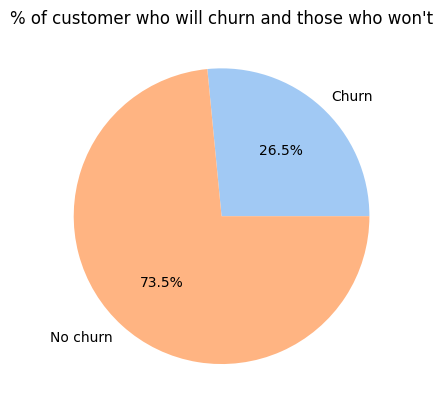

In [185]:
#The goal of this study will be to predict if a customer will churn or not. Let's see if we have a balanced dataset.

colors = sns.color_palette("pastel")

list_Churn = list(dataset_df["Churn"])
list_churnCount = [list_Churn.count("Yes"), list_Churn.count("No")]
labels_churn = ["Churn", "No churn"]

plt.pie(list_churnCount, labels=labels_churn, colors=colors, autopct='%1.1f%%')
plt.title("% of customer who will churn and those who won't")
plt.show()

The dataset is highly imbalanced, which is important to note because it can significantly affect the training process. If the machine learning algorithm primarily encounters "No churn" data, it may struggle to identify patterns and default to predicting "No churn," since that would be correct 73.5% of the time. There are several ways to address this issue:

We can adjust the dataset to include an equal number of customers who will churn and those who will not. However, this approach may require removing many entries, resulting in less data available for training the algorithm.
In our case, we will use a parameter called "class_weight" in the machine learning algorithm to address the class imbalance.

# Customers demographic

In [186]:
list_genderDistribution = list(dataset_df["gender"])
list_countGender = [list_genderDistribution.count("Male"), list_genderDistribution.count("Female")]
labels_gender = ["Male","Female"]

list_senior_citizen = list(dataset_df["SeniorCitizen"])
count_senior_citizen = [list_senior_citizen.count(0), list_senior_citizen.count(1)]
labels_age = ["Young citizen","Senior citizen"]

list_relationshipStatus = list(dataset_df["Partner"])
count_relationshipStatus = [list_relationshipStatus.count("Yes"), list_relationshipStatus.count("No")]
labels_status = ["Not single","Single"]



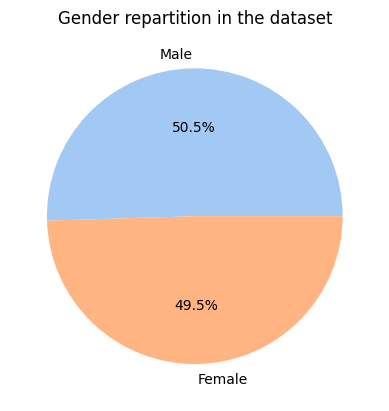

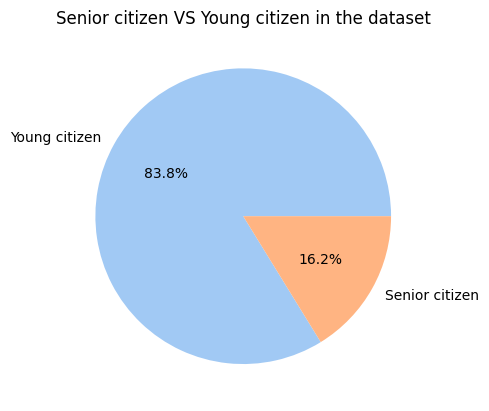

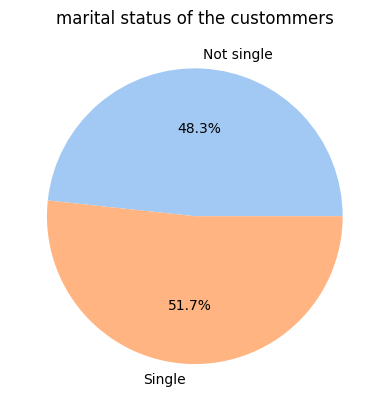

In [187]:

plt.pie(list_countGender, labels=labels_gender, colors=colors, autopct='%1.1f%%')
plt.title("Gender repartition in the dataset")
plt.show()

plt.pie(count_senior_citizen, colors=colors, labels=labels_age, autopct='%1.1f%%')
plt.title("Senior citizen VS Young citizen in the dataset")
plt.show()

plt.pie(count_relationshipStatus, colors=colors, labels=labels_status, autopct='%1.1f%%')
plt.title("marital status of the custommers")

plt.show()

The dataset is greatly balanced in terms of gender,there is almost as many male than female.

Most of the custommer in the dataset are young people (83.8%).

There is almost the same percentage of custommer who are single than custommers who have a partner. It would be interesting to see the relationship status of a customer and
if he has dependents or not. To do a more complex visualization, we will use Power BI.

The following image is a screenshot of a dashboard I created. I have also joined the .pbix to my application.

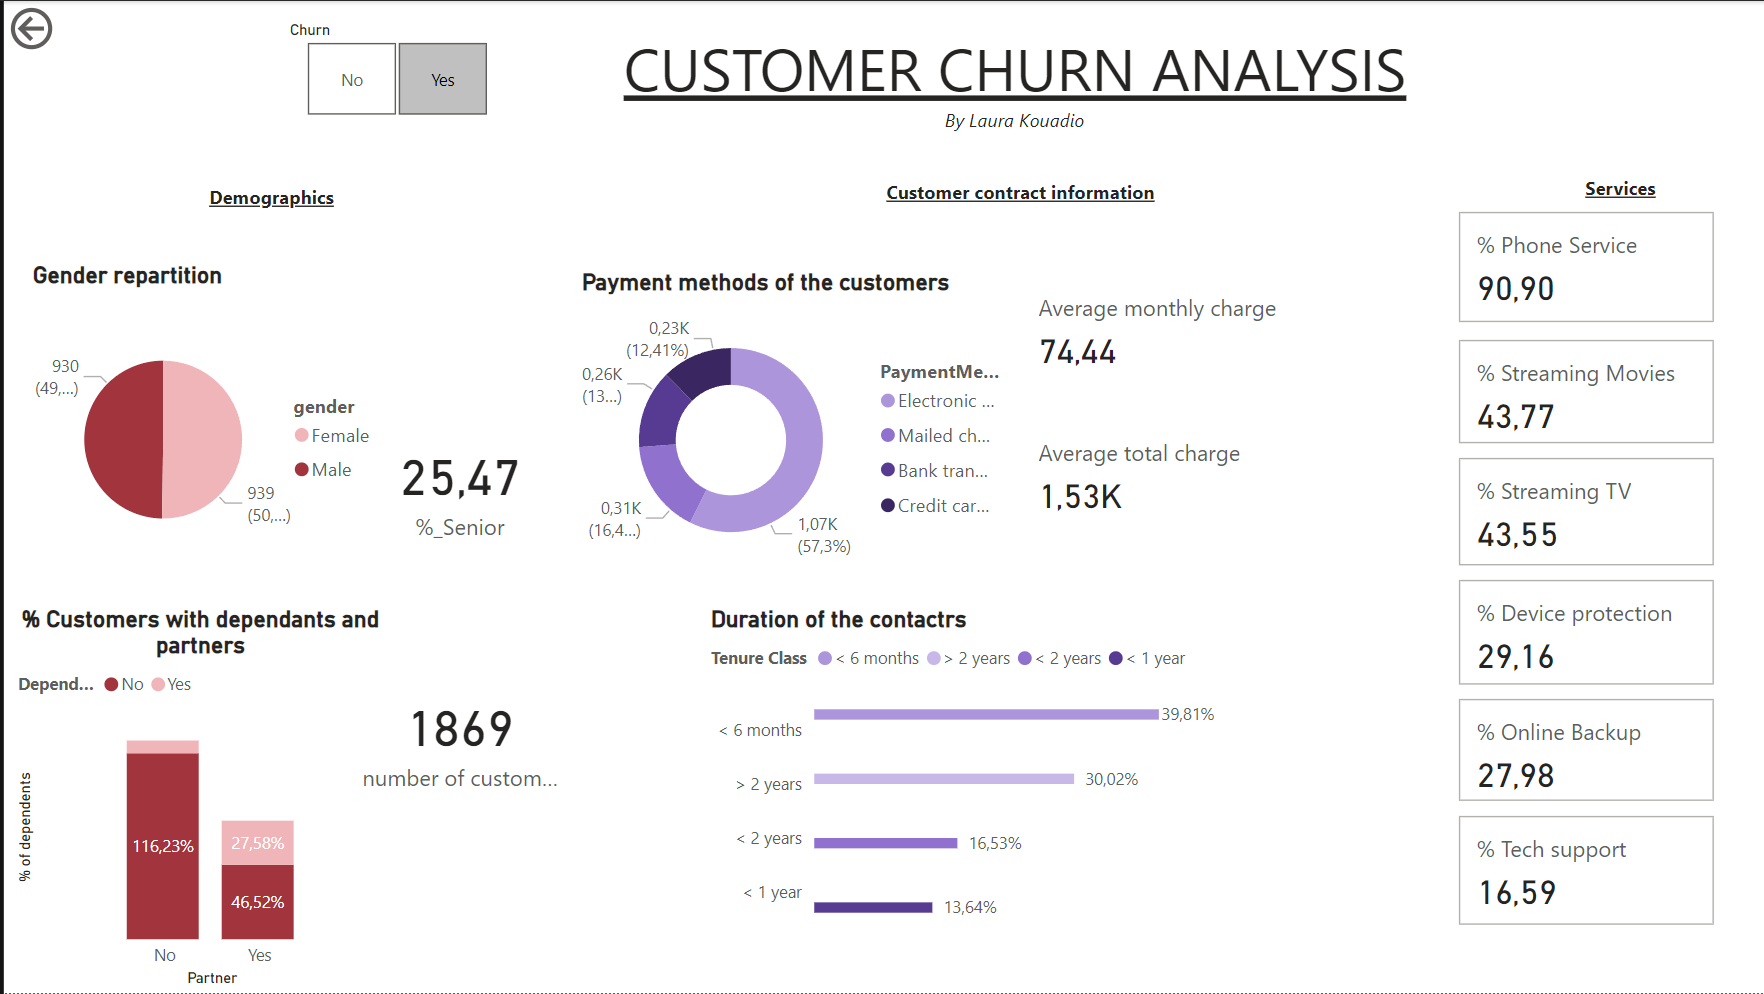

## Prepare the dataset for training

# Let's start by working on the non numerical values

In [188]:

dataset_quality = dataset_df.select_dtypes(exclude=[np.number])
dataset_quality.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [189]:
dataset_quality.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

For each column, let's check what are the possible values:

In [190]:
#Let's find the possible values for each column

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
dataset_quality_encoded = ordinal_encoder.fit_transform(dataset_quality)

In [191]:
ordinal_encoder.categories_

[array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
        '9993-LHIEB', '9995-HOTOH'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['DSL', 'Fiber optic', 'No'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Bank transfer (automatic)', 'Credit card (automatic)',
        'Electronic check', 'Mailed check'], dtype=object),
 array(['No', 'Yes'], dtype=ob

Each line of the table represents the possible values for the corresponding column.

For the columns Multiplelines,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, the possible values are:

- No 
- No internet service\ No phone service
- Yes

We could assume that "No" is the same as "No internet service".
We will leave as it for now, but it could be interesting to check if this simplication would affect the predictions results.

We will now transform the non numerical data into numerical data, before training the machine learning algorithm on the data.
We will use One hot encoding

In [192]:
dataset_quality.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [193]:
#We can start by putting the column customer ID as it does not need to be encoded.

dataset_customer_ID = dataset_quality['customerID']
dataset_quality.drop(['customerID'],axis=1, inplace=True)

In [194]:
#We use one hot encoding to encode the quality data
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
dataset_quality_one_hot = cat_encoder.fit_transform(dataset_quality)
dataset_quality_one_hot.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [195]:
cat_encoder.get_feature_names_out()

array(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'Payment

In [196]:
dataset_quality_final = pd.DataFrame(data=dataset_quality_one_hot.toarray(), columns = cat_encoder.get_feature_names_out())

In [197]:
dataset_quality_final.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [198]:
#The churn_No column is not useful, we only need churn_yes, so we are going to remove it.

dataset_quality_final.drop(['Churn_No'], inplace=True, axis=1)

In [199]:
dataset_quality_final.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


# We can now work on the numerical data

In [200]:
X_dataframe.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,29.85,29.85
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15
3,0.0,45.0,42.30,1840.75
4,0.0,2.0,70.70,151.65


Before training a machine learning algorithm on the dataset, we should normalize it to ease the training process. (Some machine learning algorithm like neural networks 
for example require input values to be between 0 and 1 for exemple).

In our case, the columns that need to be normalized are tenure, monthly charges an total charges.
Before that let's observe the data:

In [201]:
X_dataframe_toNormalize = dataset_df[["tenure","MonthlyCharges","TotalCharges"]]
X_dataframe_toNormalize.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Before the normalization, let's observe the data:

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

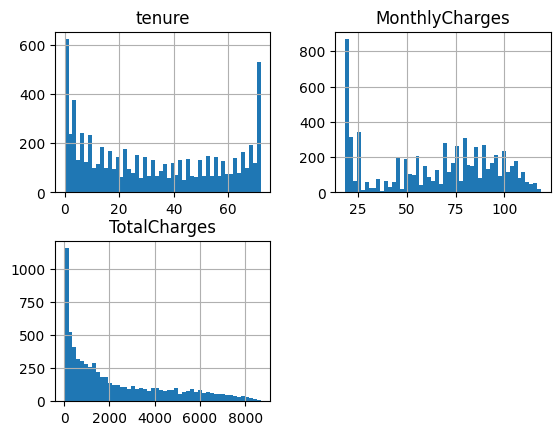

In [202]:
X_dataframe_toNormalize.hist(bins=50)

The distribution of "Total charges" is far from a Gaussian dsitribution and spreads a lot toward the right side. If we normalize the Total charges at this point,
most of the data will be squashed toward 0.
Before the normalization, we should transform the data to have a more balanced the distribution. To do that, we will replace the Total Charges column by log(Total Charges)

In [203]:
X_dataframe_toNormalize["TotalCharges"] = X_dataframe_toNormalize["TotalCharges"].apply(lambda x: np.log(x))
X_dataframe_toNormalize.head()

/var/folders/hz/s1flkr0x67bdpm7_zy1v3h8h0000gn/T/ipykernel_970/1383277585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_dataframe_toNormalize["TotalCharges"] = X_dataframe_toNormalize["TotalCharges"].apply(lambda x: np.log(x))


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,3.396185
1,34,56.95,7.544068
2,2,53.85,4.683519
3,45,42.30,7.517928
4,2,70.70,5.021575


We can now normalize the data:


In [204]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

X_dataframe_normalized = std_scaler.fit_transform(X_dataframe_toNormalize)
X_dataframe_normalized


array([[-1.27744458, -1.16032292, -2.2835652 ],
       [ 0.06632742, -0.25962894,  0.3892846 ],
       [-1.23672422, -0.36266036, -1.45402118],
       ...,
       [-0.87024095, -1.1686319 , -0.70381108],
       [-1.15528349,  0.32033821, -0.7825519 ],
       [ 1.36937906,  1.35896134,  1.21869901]])

In [205]:
X_final_normalized = pd.DataFrame(data=X_dataframe_normalized, columns=std_scaler.get_feature_names_out())
X_final_normalized.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-2.283565
1,0.066327,-0.259629,0.389285
2,-1.236724,-0.362660,-1.454021
3,0.514251,-0.746535,0.372441
4,-1.236724,0.197365,-1.236182


We can put back he normalized data in the numerical dataset.

In [206]:
X_dataframe["tenure"] = X_final_normalized["tenure"]
X_dataframe["MonthlyCharges"] = X_final_normalized["MonthlyCharges"]
X_dataframe["TotalCharges"] = X_final_normalized["TotalCharges"]

X_dataframe.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,-1.277445,-1.160323,-2.283565
1,0.0,0.066327,-0.259629,0.389285
2,0.0,-1.236724,-0.362660,-1.454021
3,0.0,0.514251,-0.746535,0.372441
4,0.0,-1.236724,0.197365,-1.236182


We can now join this quality dataset to the numerical dataset:

In [207]:
dataset_ready = pd.concat([X_dataframe, dataset_quality_final], axis=1)
dataset_ready.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,-1.277445,-1.160323,-2.283565,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.066327,-0.259629,0.389285,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,-1.236724,-0.362660,-1.454021,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.514251,-0.746535,0.372441,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,-1.236724,0.197365,-1.236182,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


The dataset is now ready for training.

# Create test and train dataset

In [209]:
#Let's start by putting the label on the side
y_label = dataset_ready["Churn_Yes"]

#and remove it from the dataset
dataset_ready.drop(['Churn_Yes'], inplace=True, axis=1)
y_label

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn_Yes, Length: 7043, dtype: float64

In [210]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dataframe, y_label, test_size=0.2, random_state=42)

# Logistic regression model

In [211]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
result = model.fit(X_train, y_train)

## Evaluation metrics

In [212]:
from sklearn import metrics

prediction_test = model.predict(X_test)

Confusion matrix

Confusion Matrix:
[[752 284]
 [ 79 294]]


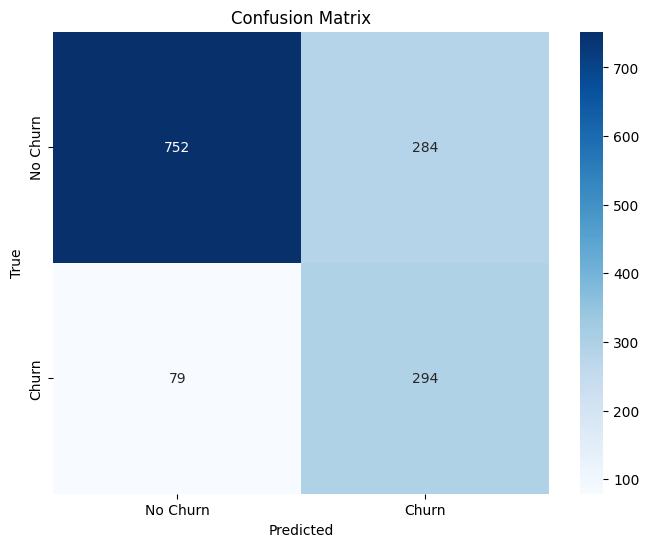

In [213]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_true are the true labels and y_pred are the predicted labels
cm = confusion_matrix(y_test, prediction_test)
precision = precision_score(y_test, prediction_test)
recall = recall_score(y_test, prediction_test)
f1 = f1_score(y_test, prediction_test)
roc_auc = roc_auc_score(y_test, prediction_test)  # y_prob are the predicted probabilities

print(f"Confusion Matrix:\n{cm}")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


The confusion matrix shows that the algorithm does a way better job at predicting customers who won't churn than customer who will:
- 752 "no churn" have been predicted correctly
- 294 churn have been predicted correctly
- 284 churn have been wongly predicted "no churn"
- 79 no churn have been wrongly predicted "churn"

In [215]:
precision = precision_score(prediction_test, y_test)
recall = recall_score(prediction_test, y_test)
f1 = f1_score(prediction_test, y_test)
roc_auc = roc_auc_score(prediction_test, y_test)  # y_prob are the predicted probabilities

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Precision: 0.7882037533512064
Recall: 0.5086505190311419
F1 Score: 0.6182965299684543
ROC AUC: 0.7067921668561246


Other metrics

As expected, the precision is really low (around 50%), meaning the algorithm fails to correctly predict churns.
It is probably due to how imbalanced the dataset is.

The recall is pretty high (around 80%), meaning the algorithm is good at predicting "No churn". This is not
surprising considering that the algorithm has been trained on mostly "No churn data".

The F1 score being low is a direct consequence of a the precision being low.


To achieve better results, one solution would be to use a more balanced dataset that includes more information about customers who have previously churned. Alternatively, we could adjust the dataset by removing data about customers who did not churn, ensuring an equal representation of both classes.